
# 📊 Simple Social Media Trend Analyzer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the dataset
df = pd.read_csv("/content/synthetic_social_media_engagement.csv")
# Preview dataset
df.head()

,post_id,user_id,user_name,user_gender,user_age,followers_count,following_count,account_creation_date,is_verified,location,...,content_length,hashtags,has_media,post_date,device,language,likes,comments,shares,engagement_rate
0,b74593f8-dd0f-4f89-87b6-dbb732ee41f1,65502997-ec46-4da1-8b32-9472d3e6d5e1,morgansharon,Other,49,59795,4290,2015-08-29,False,Bursa,...,158.0,#gadgets,True,2025-02-24,Android,de,2970.0,442.0,109.0,0.0589
1,1b6e726b-bf56-42b8-8988-f7758673184c,b60a836d-9d73-4d3f-b7fc-9f728b6f0778,longshane,Male,50,22335,217,2020-12-04,False,Ankara,...,122.0,#vacationvibes #wanderlust,True,2025-01-14,Web,de,1140.0,147.0,15.0,0.0583
2,4c676e93-8489-4f10-841d-cbff91835749,2ce68634-7873-4971-95cf-675e63d218ba,braysteven,Female,53,2672,4025,2017-07-29,False,London,...,138.0,#digitalart,True,2024-04-05,Android,tr,120.0,8.0,11.0,0.0520
3,ac250f31-3e05-4580-b87f-35733950a8ea,2a075e18-3090-4b04-a4a3-5646dfa784be,kimberly93,Other,53,5268,8803,2019-04-01,False,Antalya,...,72.0,#catlife #adoptdontshop #dogsoftwitter #petlover,False,2025-01-02,Tablet,de,268.0,25.0,13.0,0.0581
4,6a1af857-4182-4da3-896b-5232713cdb62,3a30c3b8-8658-4a33-b5ca-01a309d4fa12,ashleygamble,Female,42,1387,2986,2016-11-15,False,Ankara,...,172.0,#knowledge #students,False,2024-05-04,iPhone,de,79.0,11.0,2.0,0.0663


In [5]:
#Basic information
print(df.info())
print("\nSummary statistics:")
print(df.describe())
# Checking missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12445 entries, 0 to 12444
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   post_id                12445 non-null  object 
 1   user_id                12445 non-null  object 
 2   user_name              12445 non-null  object 
 3   user_gender            12445 non-null  object 
 4   user_age               12445 non-null  int64  
 5   followers_count        12445 non-null  int64  
 6   following_count        12445 non-null  int64  
 7   account_creation_date  12445 non-null  object 
 8   is_verified            12445 non-null  bool   
 9   location               12445 non-null  object 
 10  topic                  12445 non-null  object 
 11  post_content           12445 non-null  object 
 12  content_length         12444 non-null  float64
 13  hashtags               12444 non-null  object 
 14  has_media              12444 non-null  object 
 15  po

,0
post_id,0
user_id,0
user_name,0
user_gender,0
user_age,0
followers_count,0
following_count,0
account_creation_date,0
is_verified,0
location,0


In [7]:
df.shape

(12445, 22)

In [8]:
# Most used topics (trending keywords)
trending = df["topic"].value_counts().head(5)
print(trending)

topic
Photography    838
Fitness        830
Fashion        827
Memes          802
Technology     798
Name: count, dtype: int64


In [10]:
# Most followed accounts
top_accounts = df.groupby("user_name")["followers_count"].max().sort_values(ascending=False).head(5)
print(top_accounts)

user_name
wberry          99935
meltonjoshua    99924
miaprice        99866
kendra36        99852
brooke28        99840
Name: followers_count, dtype: int64


In [11]:
#Most liked topics
liked_topics = df.groupby("topic")["likes"].mean().sort_values(ascending=False).head(5)
print(liked_topics)

topic
Pets      2560.183673
Gaming    2555.071334
Health    2552.434555
Travel    2533.735032
Art       2525.583333
Name: likes, dtype: float64


/tmp/ipython-input-1503084762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trending.index, y=trending.values, palette='viridis')


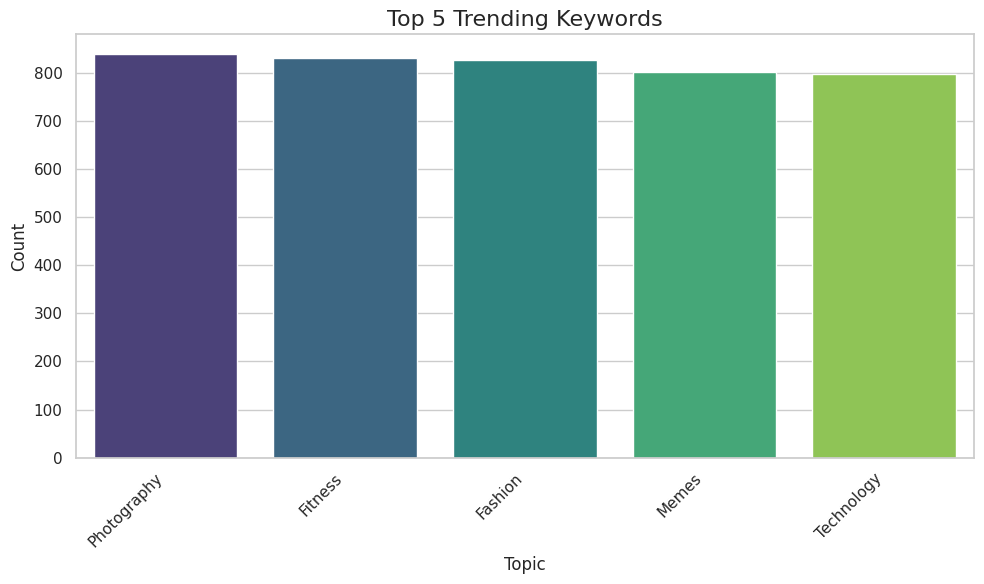

In [14]:
#Visualization 1: Top 5 Trending Keywords
plt.figure(figsize=(10, 6))
sns.barplot(x=trending.index, y=trending.values, palette='viridis')
plt.title("Top 5 Trending Keywords", fontsize=16)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now user can make reels , posts based on the most used keywords and topics that people likes and get more user engagement

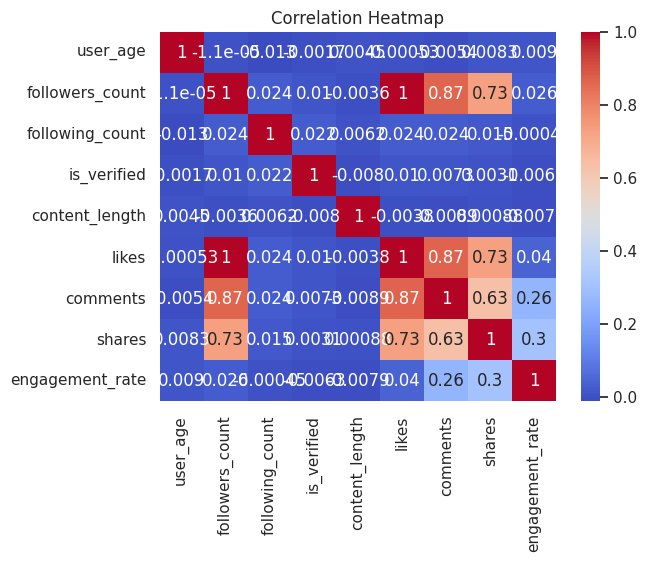

In [13]:
#Visualization 2: Correlation Heatmap (already shown above)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()